## Задание ПЗ-9.2

Результаты работы сохранить в файле PZ-9.2(N)04.12.20.ipynb , где N- порядковый номер по журналу. Файл должен содержать комментарии, поясняющие действия.

In [19]:
import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt
import random as r
import pandas as pd
from pprint import pprint
import itertools

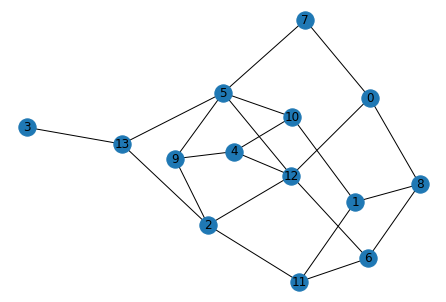

In [3]:
graph = nx.read_gml("test_9.2.gml", label='id')
nx.draw(graph, with_labels = True)
plt.show()

In [4]:
print(f'Общие характеристики:\n{nx.info(graph)}\n{graph.nodes(data=True)}')
print(f'Степени вершин:\n{graph.degree()}')
print(f'Плотность: {nx.density(graph)}')

Общие характеристики:
Name: fast_gnp_random_graph(7,7,0.4)
Type: Graph
Number of nodes: 14
Number of edges: 22
Average degree:   3.1429
[(0, {'label': '0', 'bipartite': 0}), (1, {'label': '1', 'bipartite': 0}), (2, {'label': '2', 'bipartite': 0}), (3, {'label': '3', 'bipartite': 0}), (4, {'label': '4', 'bipartite': 0}), (5, {'label': '5', 'bipartite': 0}), (6, {'label': '6', 'bipartite': 0}), (7, {'label': '7', 'bipartite': 1}), (8, {'label': '8', 'bipartite': 1}), (9, {'label': '9', 'bipartite': 1}), (10, {'label': '10', 'bipartite': 1}), (11, {'label': '11', 'bipartite': 1}), (12, {'label': '12', 'bipartite': 1}), (13, {'label': '13', 'bipartite': 1})]
Степени вершин:
[(0, 3), (1, 3), (2, 4), (3, 1), (4, 3), (5, 5), (6, 3), (7, 2), (8, 3), (9, 3), (10, 3), (11, 3), (12, 5), (13, 3)]
Плотность: 0.24175824175824176


In [5]:
print(f'Двудольный: {nx.algorithms.bipartite.is_bipartite(graph)}')
print(f'Множества узлов долей: {nx.algorithms.bipartite.sets(graph)}')

splitting = nx.algorithms.bipartite.sets(graph)

Двудольный: True
Множества узлов долей: ({0, 1, 2, 3, 4, 5, 6}, {7, 8, 9, 10, 11, 12, 13})


In [6]:
print(f'Степени вершин:\n{nx.algorithms.bipartite.degrees(graph, splitting[0])}')
print(f'Плотность: {nx.algorithms.bipartite.density(graph, splitting[0])}')

Степени вершин:
(DegreeView({7: 2, 8: 3, 9: 3, 10: 3, 11: 3, 12: 5, 13: 3}), DegreeView({0: 3, 1: 3, 2: 4, 3: 1, 4: 3, 5: 5, 6: 3}))
Плотность: 0.4489795918367347


In [7]:
def get_color(count):
    return [(r.random(), r.random(), r.random(),) for _ in range(count)]

def draw_bipartite_graph(graph):
    splitting = nx.algorithms.bipartite.sets(graph)
    
    plt.figure()
    
    nx.draw_networkx_nodes(
        graph, 
        pos = nx.drawing.layout.bipartite_layout(graph, splitting[0]), 
        nodelist = splitting[0],
        node_shape = 'o', 
        node_color = get_color(1)
    )
    
    nx.draw_networkx_nodes(
        graph,
        pos = nx.drawing.layout.bipartite_layout(graph, splitting[0]), 
        nodelist = splitting[1],
        node_shape = "s",
        node_color = get_color(1)
    )
    
    nx.draw_networkx_edges(
        graph,
        pos = nx.drawing.layout.bipartite_layout(graph, splitting[0])
    )
    
    nx.draw_networkx_labels(
        graph, 
        pos = nx.drawing.layout.bipartite_layout(graph, splitting[0])
    )
    plt.show()

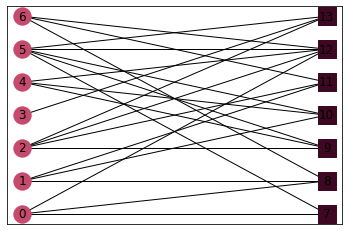

In [8]:
draw_bipartite_graph(graph)

In [9]:
with open('Davis_southern_club_women/davis.dat.txt', 'r') as open_file:
    a = open_file.read()
    buff = a.split('\n')
    nodes_1 = buff[4:22]
    nodes_2 = buff[23:37]
    edges = buff[38:-1]
    
for edge in edges:
    edges[edges.index(edge)] = edge[1:].split(' ')
    
data = pd.DataFrame(data=edges, index=nodes_1, columns=nodes_2)

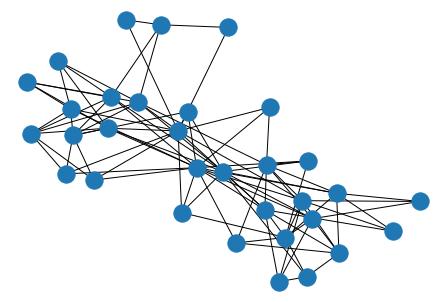

Общие характеристики:
Name: 
Type: Graph
Number of nodes: 32
Number of edges: 93
Average degree:   5.8125
[('E1', {}), ('EVELYN', {}), ('LAURA', {}), ('BRENDA', {}), ('E2', {}), ('THERESA', {}), ('E3', {}), ('CHARLOTTE', {}), ('FRANCES', {}), ('E4', {}), ('E5', {}), ('ELEANOR', {}), ('RUTH', {}), ('E6', {}), ('PEARL', {}), ('NORA', {}), ('E7', {}), ('VERNE', {}), ('SYLVIA', {}), ('HELEN', {}), ('E8', {}), ('MYRA', {}), ('KATHERINE', {}), ('DOROTHY', {}), ('E9', {}), ('OLIVIA', {}), ('FLORA', {}), ('E10', {}), ('E11', {}), ('E12', {}), ('E13', {}), ('E14', {})]
Степени вершин:
[('E1', 3), ('EVELYN', 8), ('LAURA', 7), ('BRENDA', 7), ('E2', 3), ('THERESA', 8), ('E3', 6), ('CHARLOTTE', 4), ('FRANCES', 4), ('E4', 4), ('E5', 8), ('ELEANOR', 4), ('RUTH', 4), ('E6', 8), ('PEARL', 3), ('NORA', 8), ('E7', 10), ('VERNE', 4), ('SYLVIA', 7), ('HELEN', 7), ('E8', 14), ('MYRA', 4), ('KATHERINE', 6), ('DOROTHY', 4), ('E9', 12), ('OLIVIA', 2), ('FLORA', 2), ('E10', 6), ('E11', 4), ('E12', 7), ('E13', 4

In [10]:
graph = nx.Graph()

for i in data.columns.tolist():
    for j in data.index.tolist():
        if data[i][j] == '1':
            graph.add_edge(i, j)
            
nx.draw(graph)
plt.show()

print(f'Общие характеристики:\n{nx.info(graph)}\n{graph.nodes(data=True)}')
print(f'Степени вершин:\n{graph.degree()}')
print(f'Плотность: {nx.density(graph)}')

Двудольный: True
Множества узлов долей: ({'E3', 'E5', 'E1', 'E4', 'E12', 'E11', 'E9', 'E2', 'E13', 'E6', 'E10', 'E8', 'E14', 'E7'}, {'KATHERINE', 'THERESA', 'NORA', 'FLORA', 'FRANCES', 'MYRA', 'DOROTHY', 'CHARLOTTE', 'PEARL', 'OLIVIA', 'ELEANOR', 'HELEN', 'BRENDA', 'LAURA', 'RUTH', 'SYLVIA', 'EVELYN', 'VERNE'})
Степени вершин:
(DegreeView({'BRENDA': 7, 'THERESA': 8, 'KATHERINE': 6, 'NORA': 8, 'FLORA': 2, 'FRANCES': 4, 'MYRA': 4, 'CHARLOTTE': 4, 'DOROTHY': 4, 'PEARL': 3, 'OLIVIA': 2, 'ELEANOR': 4, 'HELEN': 7, 'SYLVIA': 7, 'LAURA': 7, 'RUTH': 4, 'EVELYN': 8, 'VERNE': 4}), DegreeView({'E3': 6, 'E5': 8, 'E1': 3, 'E4': 4, 'E12': 7, 'E11': 4, 'E9': 12, 'E2': 3, 'E13': 4, 'E6': 8, 'E10': 6, 'E8': 14, 'E14': 4, 'E7': 10}))
Плотность: 0.36904761904761907


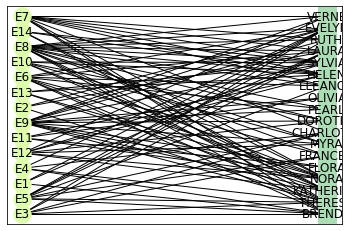

In [11]:
print(f'Двудольный: {nx.algorithms.bipartite.is_bipartite(graph)}')
print(f'Множества узлов долей: {nx.algorithms.bipartite.sets(graph)}')

splitting = nx.algorithms.bipartite.sets(graph)
print(f'Степени вершин:\n{nx.algorithms.bipartite.degrees(graph, splitting[0])}')
print(f'Плотность: {nx.algorithms.bipartite.density(graph, splitting[0])}')

draw_bipartite_graph(graph)

In [26]:
print(f'Степени вершин:\n{nx.algorithms.bipartite.degrees(graph, splitting[0])}')
print(f'Плотность: {nx.algorithms.bipartite.density(graph, splitting[0])}')

Степени вершин:
(DegreeView({'BRENDA': 7, 'THERESA': 8, 'KATHERINE': 6, 'NORA': 8, 'FLORA': 2, 'FRANCES': 4, 'MYRA': 4, 'CHARLOTTE': 4, 'DOROTHY': 4, 'PEARL': 3, 'OLIVIA': 2, 'ELEANOR': 4, 'HELEN': 7, 'SYLVIA': 7, 'LAURA': 7, 'RUTH': 4, 'EVELYN': 8, 'VERNE': 4}), DegreeView({'E3': 6, 'E5': 8, 'E1': 3, 'E4': 4, 'E12': 7, 'E11': 4, 'E9': 12, 'E2': 3, 'E13': 4, 'E6': 8, 'E10': 6, 'E8': 14, 'E14': 4, 'E7': 10}))
Плотность: 0.36904761904761907


In [22]:
G = nx.Graph()
for elem in nodes_1:
    G.add_node(elem, size=len(graph.__getitem__(elem)))
    
for elem in itertools.combinations(nodes_1, 2):
    c = set(graph.__getitem__(elem[0])).intersection(set(graph.__getitem__(elem[1])))
    if len(c)>0:
        G.add_edge(elem[0], elem[1], weight=len(c))

In [ ]:
print(f'Общие характеристики:\n{nx.info(graph)}\n{graph.nodes(data=True)}')
print(f'Степени вершин:\n{graph.degree()}')
print(f'Плотность: {nx.density(graph)}')
print(f'Средняя длина пути:\n{nx.average_shortest_path_length(G)}')
print('Cвязность:\n')
pprint(nx.degree_centrality(G))
print('Влиятельность:\n')
pprint(nx.closeness_centrality(G))
print('Посредничество:\n')
pprint(nx.betweenness_centrality(G))
print('Кратчайшие пути:\n')
pprint(nx.shortest_path(G))

In [24]:
G = ig.Graph.from_networkx(G)
for elem in G.es:
    a = elem.index
    G.es[a]['size'] = G.es[a]['weight']

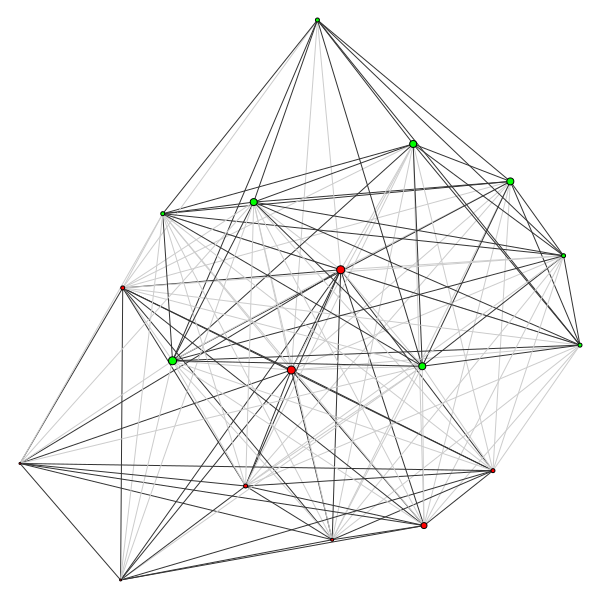

In [25]:
display(ig.plot(ig.Graph.community_multilevel(G), layout = G.layout("kk")))